## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


In [ ]:
# what do you expect to find from these data sets?

# Microsoft sees all the big companies creating original video content and they want to get in on the fun. 
# They have decided to create a new movie studio, but they don’t know anything about creating movies. 
# You are charged with exploring what types of films are currently doing the best at the box office. 
# You must then translate those findings into actionable insights that the head of Microsoft's 
# new movie studio can use to help decide what type of films to create.


In [1]:
# Your code here - remember to use markdown cells for comments as well!
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

%matplotlib inline

In [2]:
movie_gross_df=pd.read_csv('zippedData/bom.movie_gross.csv.gz')
imdb_name_basics_df=pd.read_csv('zippedData/imdb.name.basics.csv.gz')
imdb_title_akas_df=pd.read_csv('zippedData/imdb.title.akas.csv.gz')
imdb_title_basics_df=pd.read_csv('zippedData/imdb.title.basics.csv.gz')
imdb_title_crew_df=pd.read_csv('zippedData/imdb.title.crew.csv.gz')
imdb_title_principals_df=pd.read_csv('zippedData/imdb.title.principals.csv.gz')
imdb_title_ratings_df=pd.read_csv('zippedData/imdb.title.ratings.csv.gz')
rt_movie_info_df=pd.read_csv('zippedData/rt.movie_info.tsv.gz', sep='\t', header=0)
rt_reviews_df=pd.read_csv('zippedData/rt.reviews.tsv.gz',sep='\t',header=0, encoding='latin-1')
tmdb_movies_df=pd.read_csv('zippedData/tmdb.movies.csv.gz')
tn_movie_budgets_df=pd.read_csv('zippedData/tn.movie_budgets.csv.gz')

In [38]:
movie_gross_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [20]:
imdb_title_basics_df.tail(10)

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
146134,tt9916160,Drømmeland,Drømmeland,2019,72.0,Documentary
146135,tt9916170,The Rehearsal,O Ensaio,2019,51.0,Drama
146136,tt9916186,Illenau - die Geschichte einer ehemaligen Heil...,Illenau - die Geschichte einer ehemaligen Heil...,2017,84.0,Documentary
146137,tt9916190,Safeguard,Safeguard,2019,90.0,"Drama,Thriller"
146138,tt9916428,The Secret of China,The Secret of China,2019,NaN,"Adventure,History,War"
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,NaN
146143,tt9916754,Chico Albuquerque - Revelações,Chico Albuquerque - Revelações,2013,NaN,Documentary


In [27]:
imdb_title_ratings_df.head()

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [11]:
imdb_title_basics_df.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [3]:
imdb_title_and_ratings_df=imdb_title_ratings_df.join(imdb_title_basics_df.set_index('tconst'),on='tconst')
imdb_title_and_ratings_df.head() # made new df joining title of movie and average rating

,tconst,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres
0,tt10356526,8.3,31,Laiye Je Yaarian,Laiye Je Yaarian,2019,117.0,Romance
1,tt10384606,8.9,559,Borderless,Borderless,2019,87.0,Documentary
2,tt1042974,6.4,20,Just Inès,Just Inès,2010,90.0,Drama
3,tt1043726,4.2,50352,The Legend of Hercules,The Legend of Hercules,2014,99.0,"Action,Adventure,Fantasy"
4,tt1060240,6.5,21,Até Onde?,Até Onde?,2011,73.0,"Mystery,Thriller"


In [4]:
imdb_title_and_ratings_df=imdb_title_and_ratings_df.drop(columns=['start_year','runtime_minutes']) 
#don't need start year and runtime minutes

In [91]:
imdb_title_and_ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   tconst          73856 non-null  object 
 1   averagerating   73856 non-null  float64
 2   numvotes        73856 non-null  int64  
 3   primary_title   73856 non-null  object 
 4   original_title  73856 non-null  object 
 5   genres          73052 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 3.4+ MB


In [6]:
title_and_ratings_df=imdb_title_and_ratings_df.copy() #attempting to give each genre ratings
# new_title_and_ratings_df=pd.DataFrame(columns=[imdb_title_and_ratings_df.columns])

In [103]:
new_title_and_ratings_df.head()

,averagerating,numvotes,genres
0,8.3,31,Romance
1,8.9,559,Documentary
2,6.4,20,Drama
3,4.2,50352,"Action,Adventure,Fantasy"
4,6.5,21,"Mystery,Thriller"


In [7]:
new_title_and_ratings_df=title_and_ratings_df.drop(columns=['tconst','primary_title','original_title'])
# new_title_and_ratings_df=title_and_ratings_df.copy()
new_title_and_ratings_df=title_and_ratings_df.genres.str.split(',').apply(pd.Series)
new_title_and_ratings_df.index= title_and_ratings_df.set_index(['averagerating','numvotes']).index
new_title_and_ratings_df=new_title_and_ratings_df.stack().reset_index(['averagerating','numvotes'])
new_title_and_ratings_df=new_title_and_ratings_df.reset_index()
new_title_and_ratings_df=new_title_and_ratings_df.rename(columns={0:'genre'})
new_title_and_ratings_df=new_title_and_ratings_df.groupby('genre')['averagerating','numvotes'].mean()
#found average rating of each genre!!!!!

<ipython-input-7-fd3d53a0a1d4>:8: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  new_title_and_ratings_df=new_title_and_ratings_df.groupby('genre')['averagerating','numvotes'].mean()


In [8]:
#had to normalize because the difference between average rating and number of votes were significantly different
#if only number of votes were noramlized, the difference between the two columns were also significant
# however, just dividing the average rating by 10 made the bar graph much more intuitive
cols_to_norm = ['numvotes'] 
new_title_and_ratings_df[cols_to_norm] = new_title_and_ratings_df[cols_to_norm].apply(lambda x: (x - x.min()) / (x.max() - x.min()))

In [9]:
new_title_and_ratings_df['averagerating']=new_title_and_ratings_df['averagerating']/10

In [10]:
new_title_and_ratings_df=new_title_and_ratings_df.drop(['Adult','Short'],axis=0)

In [94]:
new_title_and_ratings_df

,averagerating,numvotes
genre,,
Action,0.581036,0.655877
Adventure,0.619620,1.000000
Animation,0.624831,0.398942
Biography,0.716227,0.256814
Comedy,0.600269,0.194455
Crime,0.611544,0.389259
Documentary,0.733209,0.011739
Drama,0.640156,0.175685
Family,0.639472,0.114384


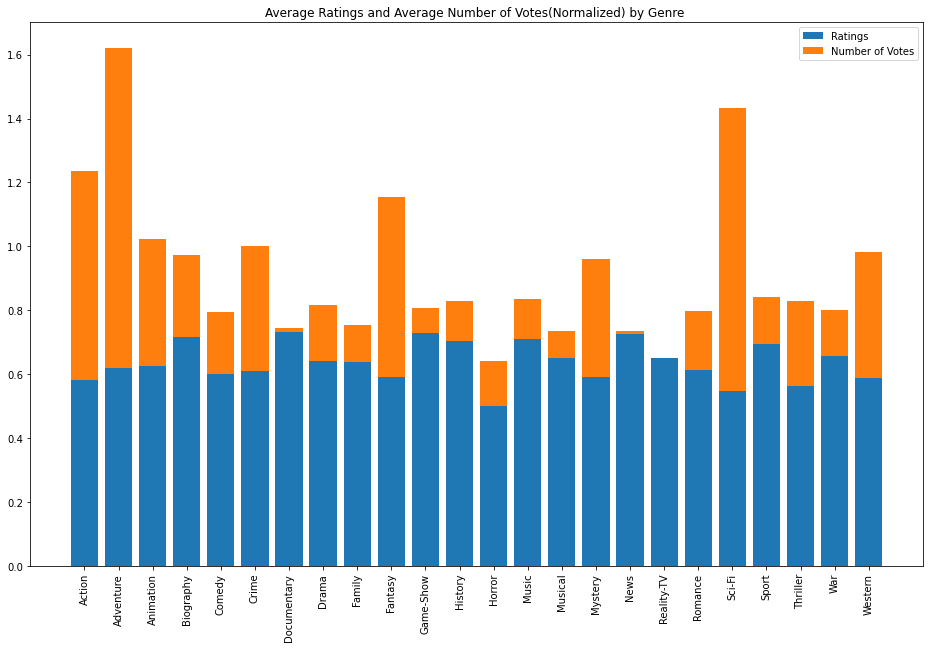

In [96]:
plt.figure(figsize=(16,10))
genre_rating=plt.bar(new_title_and_ratings_df.index,new_title_and_ratings_df['averagerating'])
genre_votes=plt.bar(new_title_and_ratings_df.index,new_title_and_ratings_df['numvotes'],bottom=new_title_and_ratings_df['averagerating'])
plt.title('Average Ratings and Average Number of Votes(Normalized) by Genre ')
plt.legend((genre_rating[0], genre_votes[0]), ('Ratings', 'Number of Votes'))
plt.xticks(rotation='vertical')
plt.yticks(np.arange(0,1.7,0.2))
plt.show()

#Note that because some movies have multiple genres, the number of votes and ratings were repeated

In [25]:
rt_reviews_df.head()

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"


In [36]:
rt_movie_info_df.info()#rating as in pg or r etc.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1498 non-null   object
 2   rating        1557 non-null   object
 3   genre         1552 non-null   object
 4   director      1361 non-null   object
 5   writer        1111 non-null   object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-null   object
 8   currency      340 non-null    object
 9   box_office    340 non-null    object
 10  runtime       1530 non-null   object
 11  studio        494 non-null    object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB


In [11]:
new_rt_info_df=rt_movie_info_df.copy()
new_rt_info_df=new_rt_info_df.dropna(axis=0,subset=['box_office']) #

In [12]:
new_rt_info_df=new_rt_info_df.drop(columns=['synopsis','studio'])
new_rt_info_df['box_office']=new_rt_info_df['box_office'].str.replace(',','').astype('int64')

In [28]:
new_rt_info_df.tail(10)

,id,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime
1526,1962,PG-13,Comedy|Drama,Ridley Scott,Nicholas Griffin|Ted Griffin,"Sep 12, 2003","Jun 1, 2004",$,36873198,116 minutes
1528,1965,G,Animation|Kids and Family,Robert Ramirez,Robert Ramirez|Rhett Reese,"Apr 23, 2004","Aug 24, 2004",$,2782548,73 minutes
1530,1968,PG,Comedy|Drama,Cameron Crowe,Aline Brosh McKenna|Cameron Crowe,"Dec 23, 2011","Apr 3, 2012",$,72700000,126 minutes
1536,1975,NR,Drama|Romance,Vikramaditya Motwane,Vikramaditya Motwane|Bhavani Iyer|Anurag Kashyap,"Jul 3, 2013","Jan 12, 2015",$,581813,142 minutes
1537,1976,NR,Action and Adventure|Art House and International,Ciro Guerra,Ciro Guerra|Jacques Toulemonde Vidal,"Feb 17, 2016","Jun 21, 2016",$,1320005,123 minutes
1541,1980,PG-13,Action and Adventure|Science Fiction and Fantasy,Joss Whedon,Joss Whedon,"Sep 30, 2005","Dec 20, 2005",$,25335935,119 minutes
1542,1981,NR,Comedy|Drama,Gauri Shinde,Gauri Shinde,"Oct 5, 2012","Nov 20, 2012",$,1416189,129 minutes
1545,1985,R,Horror|Mystery and Suspense,Sebastian Gutierrez,Sebastian Gutierrez,"Jun 1, 2007","Oct 9, 2007",$,59371,98 minutes
1546,1986,PG,Art House and International|Comedy|Drama,NaN,NaN,"Aug 30, 2002","Oct 7, 2003",$,794306,97 minutes
1555,1996,R,Action and Adventure|Horror|Mystery and Suspense,NaN,NaN,"Aug 18, 2006","Jan 2, 2007",$,33886034,106 minutes


In [13]:
genre_boxoffice_df=new_rt_info_df.genre.str.split('|').apply(pd.Series)
genre_boxoffice_df.index= new_rt_info_df.set_index(['rating','box_office']).index
genre_boxoffice_df=genre_boxoffice_df.stack().reset_index(['rating','box_office'])
genre_boxoffice_df=genre_boxoffice_df.reset_index()
genre_boxoffice_df=genre_boxoffice_df.rename(columns={0:'genre'})
genre_boxoffice_df=genre_boxoffice_df.drop(columns=['index'])
genre_boxoffice_df=genre_boxoffice_df.groupby(['genre']).mean()#,'rating'])#['box_office']

In [40]:
genre_boxoffice_df

,box_office
genre,
Action and Adventure,6.232875e+07
Animation,5.619246e+07
Art House and International,2.222098e+06
Classics,6.750000e+06
Comedy,4.191096e+07
Cult Movies,1.390000e+07
Documentary,1.185648e+07
Drama,2.825376e+07
Faith and Spirituality,5.380785e+06


In [14]:
tmdb_movies_df=tmdb_movies_df.drop(columns=['Unnamed: 0'])
tmdb_movies_df.head()


,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [15]:
tn_movie_budgets_df['production_budget']=tn_movie_budgets_df['production_budget'].str.replace('$','').str.replace(',','').astype('int64')
tn_movie_budgets_df['domestic_gross']=tn_movie_budgets_df['domestic_gross'].str.replace('$','').str.replace(',','').astype('int64')
tn_movie_budgets_df['worldwide_gross']=tn_movie_budgets_df['worldwide_gross'].str.replace('$','').str.replace(',','').astype('int64')
# changing production budget, domestic gross, and worldwide gross from str to float to use for xticks and yticks
# in the scatter plot

# for some reason making the series above into type int64 or float64 makes the graphs different.

In [40]:
tn_movie_budgets_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747


In [26]:
tn_movie_budgets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   int64 
 4   domestic_gross     5782 non-null   int64 
 5   worldwide_gross    5782 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 271.2+ KB


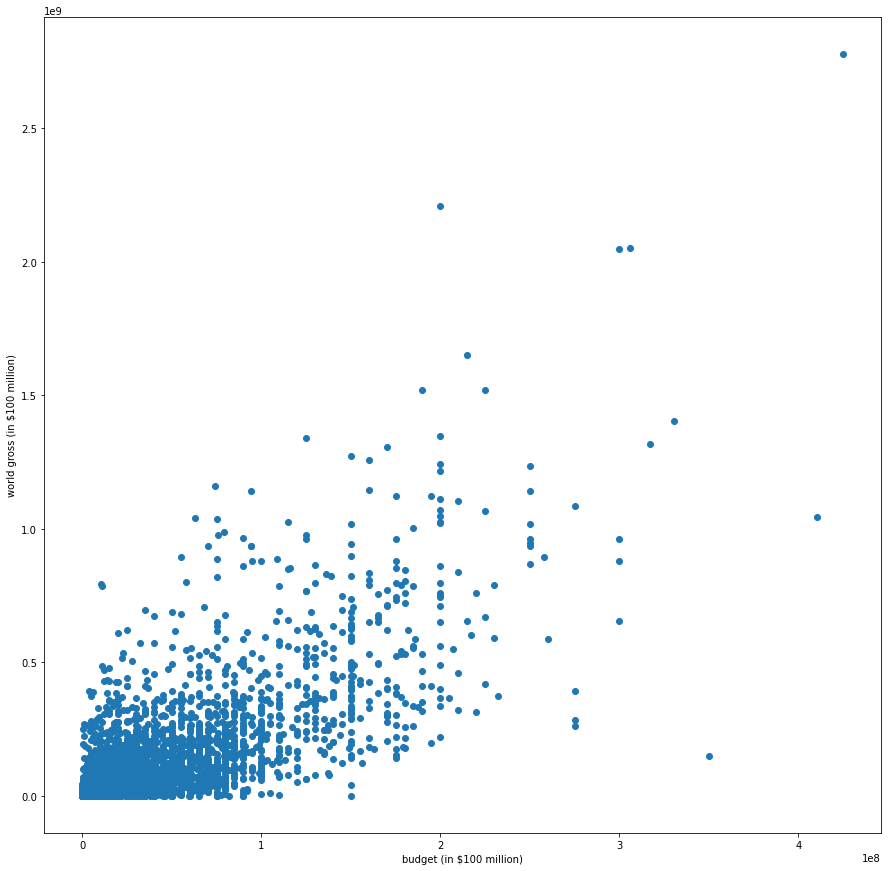

In [22]:
plt.figure(figsize=(15,15))
plt.scatter(tn_movie_budgets_df['production_budget'],tn_movie_budgets_df['worldwide_gross'])#,s=55, cmap=cmap, norm=norm)
plt.xlabel('budget (in $100 million)')
plt.ylabel('world gross (in $100 million)')
# plt.xticks(np.arange(min(practice),max(practice),100000))
# plt.yticks(np.arange(min(tn_movie_budgets_df['worldwide_gross']),max(tn_movie_budgets_df['worldwide_gross']),100000000))
# plt.xlim([0,60000000]) #use ylim to create bounds (basically zoomed in)
# plt.ylim([0,80000000])
plt.show() #maybe add a trendline, if that's gonna help at all 
#https://stackoverflow.com/questions/41635448/how-can-i-draw-scatter-trend-line-on-matplot-python-pandas/41635626

In [39]:
movie_gross_df.head(10)

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
5,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000,2010
6,Iron Man 2,Par.,312400000.0,311500000,2010
7,Tangled,BV,200800000.0,391000000,2010
8,Despicable Me,Uni.,251500000.0,291600000,2010
9,How to Train Your Dragon,P/DW,217600000.0,277300000,2010


In [16]:
movie_gross_df['domestic_gross']=movie_gross_df['domestic_gross'].fillna(movie_gross_df['domestic_gross'].mean())

In [17]:
movie_gross_df['domestic_gross'].describe()

count    3.387000e+03
mean     2.874585e+07
std      6.670497e+07
min      1.000000e+02
25%      1.225000e+05
50%      1.400000e+06
75%      2.874585e+07
max      9.367000e+08
Name: domestic_gross, dtype: float64